<a href="https://colab.research.google.com/github/sudipbhattarai820/Machine_Learning_Projects/blob/main/Sentiment_Analysis_With_Tranformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with Transformer


In [ ]:
## Lets import all the necessary libraries
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## Let's install listof stopwords, punktwords using nltk
# nltk.download('stopwords')
# nltk.download('wordnet')

## Gathering the data

In [ ]:
## Lets unzip the data
import zipfile
zip_ref = zipfile.ZipFile("/content/Sentiment_Data.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Now lets read the csv file
tweets_data = pd.read_csv("Sentiment_Data.csv",encoding='unicode_escape')
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451333 entries, 0 to 451332
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Tweet      451332 non-null  object
 1   Sentiment  451332 non-null  object
dtypes: object(2)
memory usage: 6.9+ MB


In [ ]:
tweets_data = tweets_data.sample(100000,replace=False)
tweets_data.head(10)

,Tweet,Sentiment
378454,@Flavia0847 @m_tanton Wow you fell for the Go...,Strong_Pos
254856,#Bitcoin #CanadaTruckers2022 #NFTCommunity \n\...,Strong_Pos
449108,#Inspiration - âItâs not about ideas. Itâ...,Neutral
424262,Brittney? has signs for kids tomorrow that say...,Mild_Pos
328163,Higgs talks about the freedom convoy. He says ...,Strong_Pos
338058,Mssage all canadians from the Convoy for freed...,Strong_Pos
50300,"""judge"" in POE inquiry decides to interfere in...",Strong_Pos
171890,Fuel â½ï¸ prices going â¬ï¸ at the same ti...,Strong_Pos
164145,Can we just call the #FreedomConvoy what it is...,Strong_Neg
226464,ð´LIVE Ottawa - RAW Footage: Freedom Convoy ...,Mild_Pos


## Exploratory Data Analysis

In [ ]:
# Let's see the data information
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 378454 to 154377
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Tweet      100000 non-null  object
 1   Sentiment  100000 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [ ]:
## Let's count the classes we have for each sentiment
values = tweets_data['Sentiment'].value_counts()
unique_values = values.index

In [ ]:
## Let's drop the nan values from the datframe
data = tweets_data.dropna()
data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 378454 to 154377
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Tweet      100000 non-null  object
 1   Sentiment  100000 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


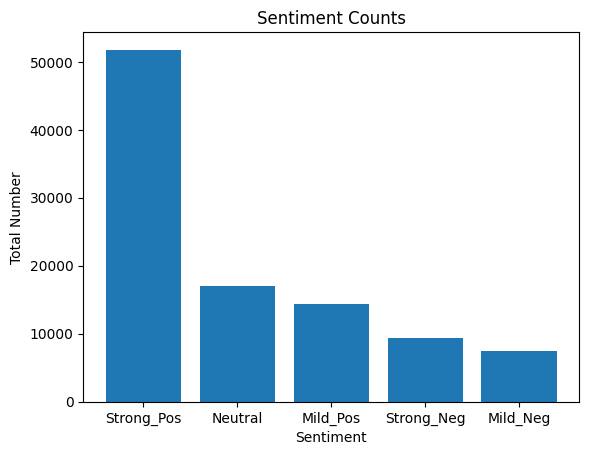

In [ ]:
## Let's plot the graph for the total number of each class in the data
plt.bar(x=unique_values,height=values)
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Total Number')
plt.show()

🔑**Note:** We can observe that data points is highly skewed and class is imbalanced. We can apply oversampling techniques to oversample the minority class.

In [ ]:
## ok lets see whats the disribution of length of each tweet, we will define a function just to count the total number of words in a sentence.
def count_words(data,col_name):
  word_counts = []
  for word in data[col_name]:
    if isinstance(word,str):
      word_counts.append(len(word.split()))
  return word_counts

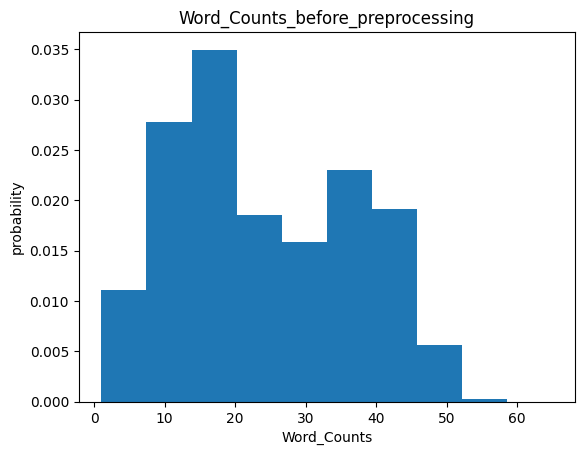

In [ ]:
## Let's plot the histogram
plt.title('Word_Counts_before_preprocessing')
plt.hist(x=count_words(data,"Tweet"),density=True)
plt.xlabel('Word_Counts')
plt.ylabel('probability')
plt.show()


In [ ]:
## Let's visualize the wordclouds in out tweets, i.e. which words are frequently occurring
## Lets define a function
def plot_word_cloud(data,col_name,title):
    rand_index = np.random.randint(len(data[col_name]))
    from wordcloud import WordCloud
    text = data[col_name].iloc[rand_index]
    wordcloud = WordCloud().generate(text)
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()


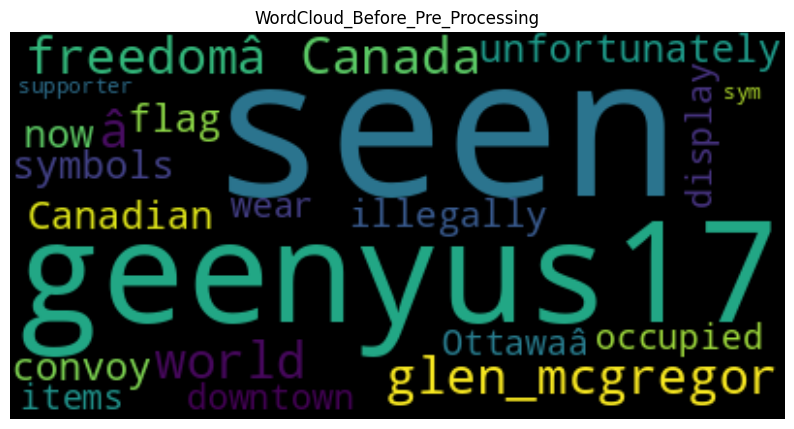

In [ ]:
plot_word_cloud(data,"Tweet","WordCloud_Before_Pre_Processing")

## Preprocessing
> 📓In this section, we will clean the text, which can be done by following ways:
* We need to remove specific patterns (e.g. links, emojis, special characters `!`,`@`) using regex (re library).


In [ ]:
import re
# Function to separate words after capital letters
def separate_words_after_capital(word):
    if isinstance(word,str):
      return re.sub(r'([A-Z][a-z]*)', r' \1', word).strip()

In [ ]:
data['cleaned_Tweet'] = data['Tweet'].str.replace(r"[^a-zA-Z0-9\s]",'',regex=True) #Remove special characters such as @,# and so on
data['cleaned_Tweet'] = data['cleaned_Tweet'].str.replace(r'https://\S+','',regex=True) # Remove links that starts with https://
data['cleaned_Tweet'] = data["cleaned_Tweet"].str.replace(r'https\S+','',regex=True) # Remove anywords that starts with https
data['cleaned_Tweet'] = data['cleaned_Tweet'].apply(lambda tweet: separate_words_after_capital(tweet))

for i in range(len(data['cleaned_Tweet'])):
    if isinstance(data['cleaned_Tweet'][i], str):
        tweet_blob = TextBlob(data['cleaned_Tweet'][i])
        corrected_tweet = " ".join(tweet_blob.correct() for tweet_blob in tweet_blob.words)
        data['cleaned_Tweet'][i] = corrected_tweet

### Visualization after preprocessing
> ❗In this section, we will explore our cleaned tweet after the preprocessing, just to have a visual understanading.

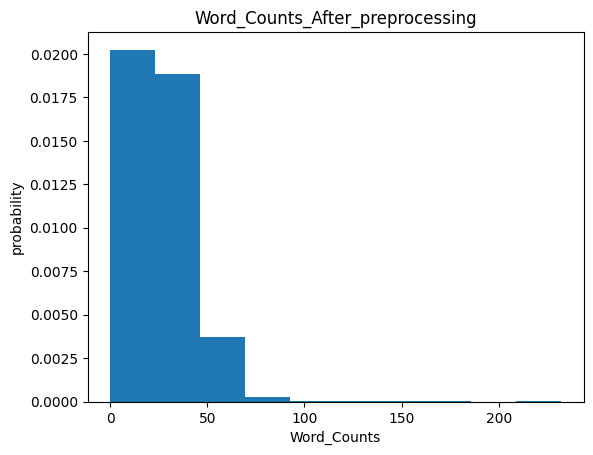

In [ ]:
## Let's plot the histogram
plt.title('Word_Counts_After_preprocessing')
plt.hist(x=count_words(data,"cleaned_Tweet"),density=True)
plt.xlabel('Word_Counts')
plt.ylabel('probability')
plt.show()

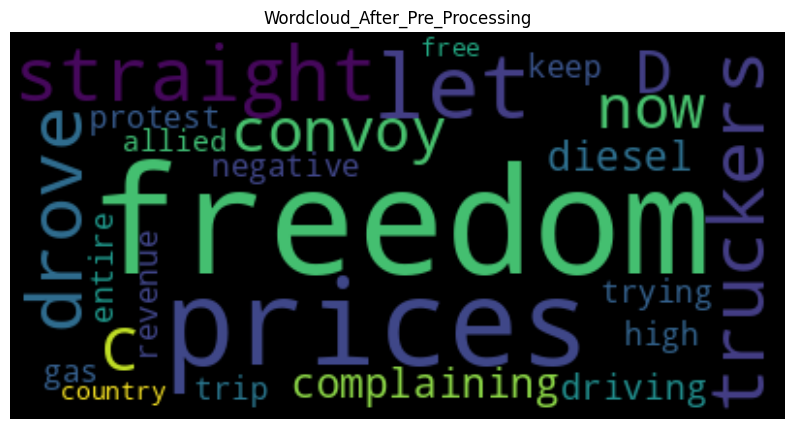

In [ ]:
# Let's plot the wordcloud as well
plot_word_cloud(data,'cleaned_Tweet','Wordcloud_After_Pre_Processing')

In [ ]:
## Let's try to find the vocabulary for my text data
text_column = 'cleaned_Tweet'
data = data.dropna(subset=[text_column])
all_text = " ".join(data[text_column])
words = re.findall(r'\b\w+\b', all_text.lower())
unique_words = set(words)
## Total number of vocabulary is
len(unique_words)

85833

## Model Building
> ▶In this section we will divide the data into training and test data , we will build our attention model with multi-headed attention and embedding layers with positional encoders. We will Tensorflow and Keras for model building.

In [ ]:
import tensorflow as tf

In [ ]:
## First lets create the tokens of the text
tokenizer = tf.keras.preprocessing.text.Tokenizer()
text = data['cleaned_Tweet'].tolist()
tokenizer.fit_on_texts(text)

In [ ]:
# Converting the text into sequences
if isinstance(tokenizer.word_index, set):
    tokenizer.word_index = dict(tokenizer.word_index)
sequences = tokenizer.texts_to_sequences(text)
sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen= max(len(seq) for seq in sequences))

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
max_len = max(len(seq) for seq in sequences)
vocab_size,max_len

(86868, 232)

In [ ]:
# Convert Sentiment Labels to Numeric Values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Target'] = label_encoder.fit_transform(data['Sentiment'])
num_classes = len(label_encoder.classes_)

In [ ]:
## Converting the data['Target'] into ndarray
y = data['Target'].values
y.shape

(100000,)

In [ ]:
# Split the Data into Training and Validation Sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(sequences, y, test_size=0.2, random_state=42)

### Positional Encoding

In [ ]:
## Let's define a function for the positional encoding
def get_pos_encoding(max_len,embed_dimension):
  angle_values = get_angles(tf.range(max_len,dtype=tf.float32)[:,tf.newaxis],
                            tf.range(embed_dimension,dtype=tf.float32)[tf.newaxis,:],
                            embed_dimension)
  sines =   tf.math.sin(angle_values[:,0::2])
  cosines = tf.math.cos(angle_values[:,1::2])
  pos_encodings = tf.concat([sines,cosines],axis=-1)
  #pos_encodings = pos_encodings[tf.newaxis,...]
  return tf.convert_to_tensor(pos_encodings,dtype=tf.float32)

def get_angles(position,i,embed_dimension):
  angle_rates = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(embed_dimension, tf.float32))
  return position * angle_rates

### Building multiheaded Transformers

In [ ]:

def build_multi_head_transformer(max_len,vocab_size,embed_dimension,num_heads,d_ff,num_encoder_layers,dropout_rate):
  inputs = tf.keras.layers.Input(shape=(max_len,))
  x = inputs

  ## Lets define the embedding layer
  x = tf.keras.layers.Embedding(vocab_size,embed_dimension)(x)
  pos_encoding = get_pos_encoding(max_len,embed_dimension)



  ## Now let's braodcast to match the shape of the both output
  # Broadcast positional encoding to match the batch size of 'x'
  batch_size = tf.shape(x)[0]
  pos_encoding = tf.broadcast_to(pos_encoding, [batch_size, tf.shape(pos_encoding)[0], tf.shape(pos_encoding)[1]])

   ## Shape of the output from the embedding layer and positional encoder function
  print(f'Shape of the output of embedding layer is:{x.shape}')
  print(f'Shape of the output of positional encoder  is:{(pos_encoding).shape}')

  # Add positional encoding to the output of the embedding layer
  x_with_pos_encoding = x + pos_encoding



  ## Let's define the multiheaded attention layer
  for i in range(num_encoder_layers):
    x = tf.keras.layers.MultiHeadAttention(num_heads,embed_dimension,dropout=dropout_rate)(x_with_pos_encoding,x_with_pos_encoding,x_with_pos_encoding)
    print(x.shape)
  # Position-wise feedforward layer
    x = tf.keras.layers.Normalization()(x)
    x = tf.keras.layers.Dense(d_ff, activation='relu')(x)
    print(x.shape)
  # Final output layer (you can modify this based on your task)
  print(f'The number of classes are: {num_classes}')
  # Global average pooling to reduce the sequence length to 1
  x = tf.keras.layers.GlobalAveragePooling1D()(x)
  outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

  model = tf.keras.Model(inputs=inputs, outputs=outputs)
  return model


In [ ]:
## Let's build the model
max_len =max_len
vocab_size = vocab_size
embed_dimension = 50
num_heads=2
d_ff = 100
num_encoder_layers = 1
dropout_rate =0.1

# Creating the model
optimus_prime = build_multi_head_transformer(max_len,vocab_size,embed_dimension,num_heads,d_ff,num_encoder_layers,dropout_rate)

# Compile the model
optimus_prime.compile(loss='sparse_categorical_crossentropy',
                      optimizer= tf.keras.optimizers.Adam(),
                      metrics = ['accuracy'])


Shape of the output of embedding layer is:(None, 232, 50)
Shape of the output of positional encoder  is:(None, 232, 50)
(None, 232, 50)
(None, 232, 100)
The number of classes are: 5


In [ ]:
optimus_prime.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 232)]        0           []                               
                                                                                                  
 embedding_8 (Embedding)        (None, 232, 50)      4343400     ['input_5[0][0]']                
                                                                                                  
 tf.compat.v1.shape_4 (TFOpLamb  (3,)                0           ['embedding_8[0][0]']            
 da)                                                                                              
                                                                                                  
 tf.__operators__.getitem_4 (Sl  ()                  0           ['tf.compat.v1.shape_4[0][0

In [ ]:
# Convert NumPy arrays to TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.int64)
X_val_tensor = tf.convert_to_tensor(X_val, dtype=tf.float32)
y_val_tensor = tf.convert_to_tensor(y_val, dtype=tf.int64)
# Verify shapes and data types
print("Shapes:")
print("X_train shape:", X_train_tensor.shape)
print("y_train shape:", y_train_tensor.shape)
print("X_val shape:", X_val_tensor.shape)
print("y_val shape:", y_val_tensor.shape)

print("\nData Types:")
print("X_train dtype:", X_train_tensor.dtype)
print("y_train dtype:", y_train_tensor.dtype)
print("X_val dtype:", X_val_tensor.dtype)
print("y_val dtype:", y_val_tensor.dtype)

Shapes:
X_train shape: (80000, 232)
y_train shape: (80000,)
X_val shape: (20000, 232)
y_val shape: (20000,)

Data Types:
X_train dtype: <dtype: 'float32'>
y_train dtype: <dtype: 'int64'>
X_val dtype: <dtype: 'float32'>
y_val dtype: <dtype: 'int64'>


In [ ]:
history = optimus_prime.fit(X_train_tensor,y_train_tensor,epochs=5,validation_data=(X_val_tensor,y_val_tensor),batch_size=32)

Epoch 1/5
2500/2500 [==============================] - 874s 349ms/step - loss: 1.1127 - accuracy: 0.5810 - val_loss: 0.9843 - val_accuracy: 0.6275
Epoch 2/5
2500/2500 [==============================] - 849s 340ms/step - loss: 0.9025 - accuracy: 0.6568 - val_loss: 0.9724 - val_accuracy: 0.6378
Epoch 3/5
2500/2500 [==============================] - 852s 341ms/step - loss: 0.7853 - accuracy: 0.7005 - val_loss: 0.9749 - val_accuracy: 0.6317
Epoch 4/5
2500/2500 [==============================] - 897s 359ms/step - loss: 0.6834 - accuracy: 0.7422 - val_loss: 1.0304 - val_accuracy: 0.6181
Epoch 5/5
2500/2500 [==============================] - 849s 340ms/step - loss: 0.5922 - accuracy: 0.7806 - val_loss: 1.1456 - val_accuracy: 0.6115


## Evaluating the Transformer Model

In [ ]:
def plot_loss_curve(history):
  train_loss = history.history['loss']
  train_accuracy = history.history['accuracy']
  val_loss = history.history['val_loss']
  val_accuracy = history.history['val_accuracy']
  epochs = 5

  # Lets plot the loss and val accuracy
  plt.plot(train_loss,label='Training loss',c='blue')
  plt.plot(val_loss,label='Validation_loss',c='Red')
  plt.xlabel('epochs')
  plt.ylabel('Loss')
  plt.title('Loss-Plot')
  plt.legend()
  plt.figure()
  plt.plot(train_accuracy,label='Training Accuracy',c='blue')
  plt.plot(val_accuracy,label='Validation_Accuracy',c='Red')
  plt.xlabel('epochs')
  plt.ylabel('Accuracy')
  plt.title('Accuracy-plot')
  plt.legend()
  plt.show()


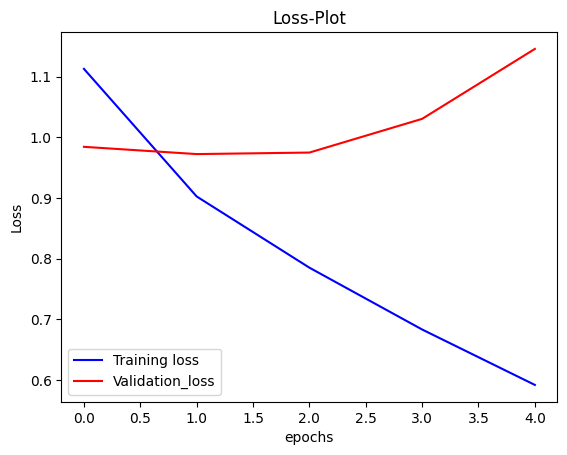

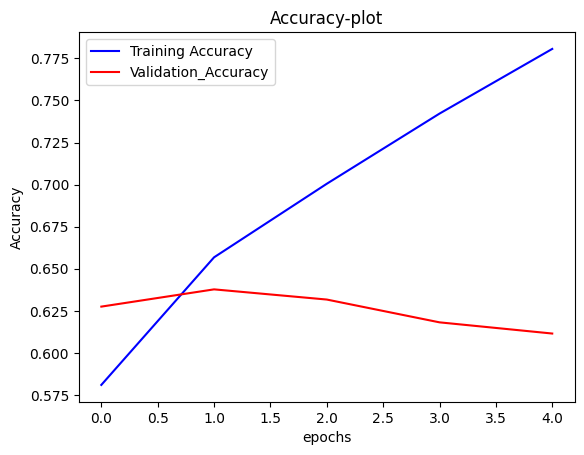

In [ ]:
plot_loss_curve(history)

In [ ]:
### define a function to build confusion-Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
def draw_confusion_matrix(y_preds,y_test,model_name):
    ## Confusion matrix
    cm = confusion_matrix(y_val,y_preds)
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix '+model_name)
    plt.show()

In [ ]:
## Calculate the metrics for the Transformer
from sklearn.metrics import roc_auc_score
# Calculate the micro-averaged AUC score
def calc_roc_auc_score(y_preds,y_test,model_name):
    auc_score_micro = roc_auc_score(y_test, y_preds, multi_class='ovr', average='micro')
    print(f'The ROC-AUC Score of our {model_name} model is{auc_score_micro}')

## BILSTM MODEL

In [ ]:
#Create the BiLSTM model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dimension, input_length=max_len))
model.add(tf.keras.layers.DropOut(0.2))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, return_sequences=False)))
model.add(tf.keras.layers.Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 232, 50)           4343400   
                                                                 
 bidirectional_4 (Bidirectio  (None, 128)              58880     
 nal)                                                            
                                                                 
 dense_46 (Dense)            (None, 5)                 645       
                                                                 
Total params: 4,402,925
Trainable params: 4,402,925
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_2 = model.fit(X_train_tensor,y_train_tensor,epochs=5,validation_data=(X_val_tensor,y_val_tensor),batch_size=32)

Epoch 1/5
2500/2500 [==============================] - 1033s 411ms/step - loss: 1.0784 - accuracy: 0.5954 - val_loss: 0.9615 - val_accuracy: 0.6392
Epoch 2/5
2500/2500 [==============================] - 1066s 426ms/step - loss: 0.8241 - accuracy: 0.6913 - val_loss: 0.9096 - val_accuracy: 0.6589
Epoch 3/5
2500/2500 [==============================] - 1065s 426ms/step - loss: 0.6408 - accuracy: 0.7621 - val_loss: 0.9690 - val_accuracy: 0.6583
Epoch 4/5
2500/2500 [==============================] - 1066s 426ms/step - loss: 0.4952 - accuracy: 0.8199 - val_loss: 1.0751 - val_accuracy: 0.6454
Epoch 5/5
2500/2500 [==============================] - 910s 364ms/step - loss: 0.3838 - accuracy: 0.8621 - val_loss: 1.1843 - val_accuracy: 0.6312


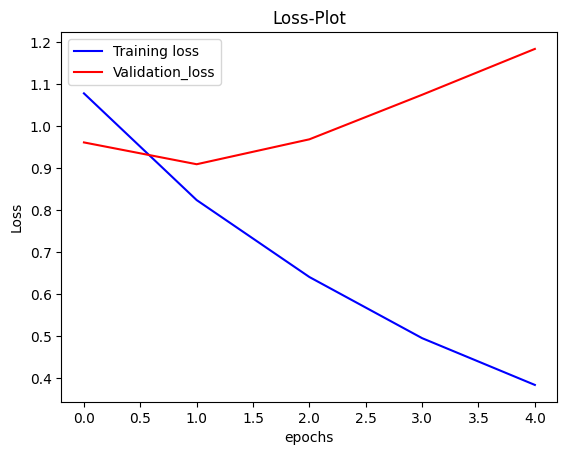

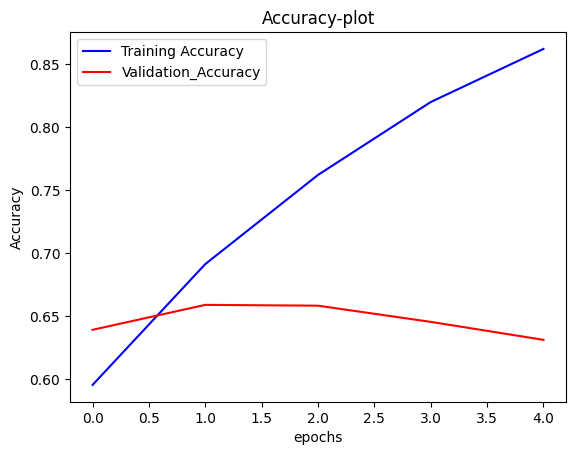

In [ ]:
## Plotting the loss curve for the bilstm model
plot_loss_curve(history_2)

## Evaluation Of Both Model

In [ ]:
## Comapring the confusion_matrix and roc_auc metrics for the both model
y_preds_transformer = optimus_prime.predict(X_val)
y_preds_BILSTM = model.predict(X_val)

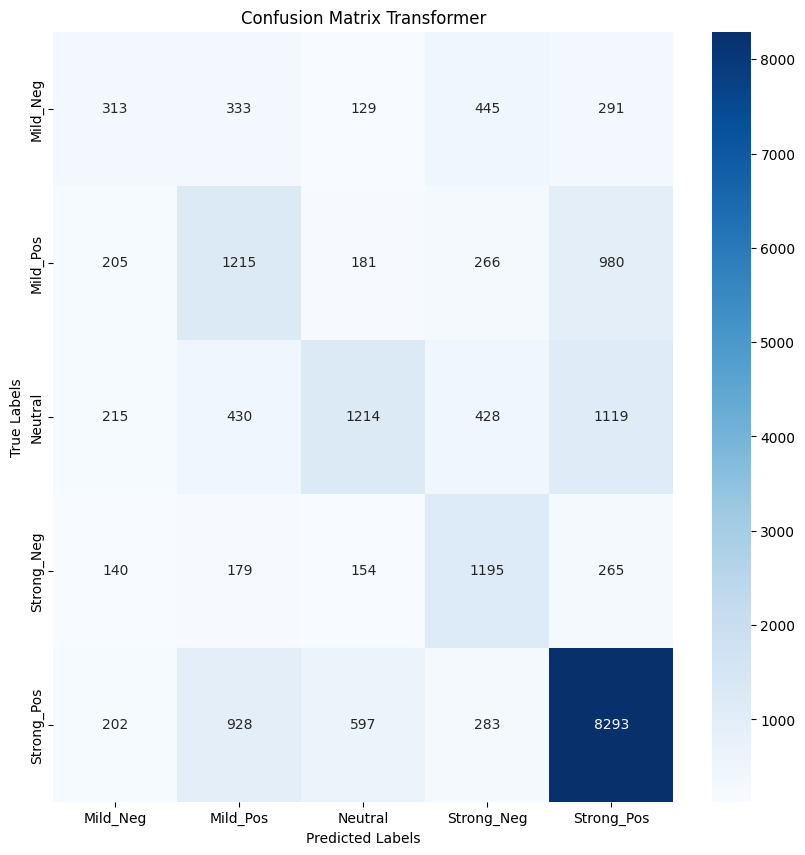

The ROC-AUC Score of our Transformer model is0.8606780503125


In [ ]:

y_preds_class_transformer = np.argmax(y_preds_transformer,axis=-1)
y_preds_class_BILSTM = np.argmax(y_preds_BILSTM,axis=-1)
##>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
draw_confusion_matrix(y_preds_class_transformer,y_val,'Transformer')
calc_roc_auc_score(y_preds_transformer,y_val,'Transformer')

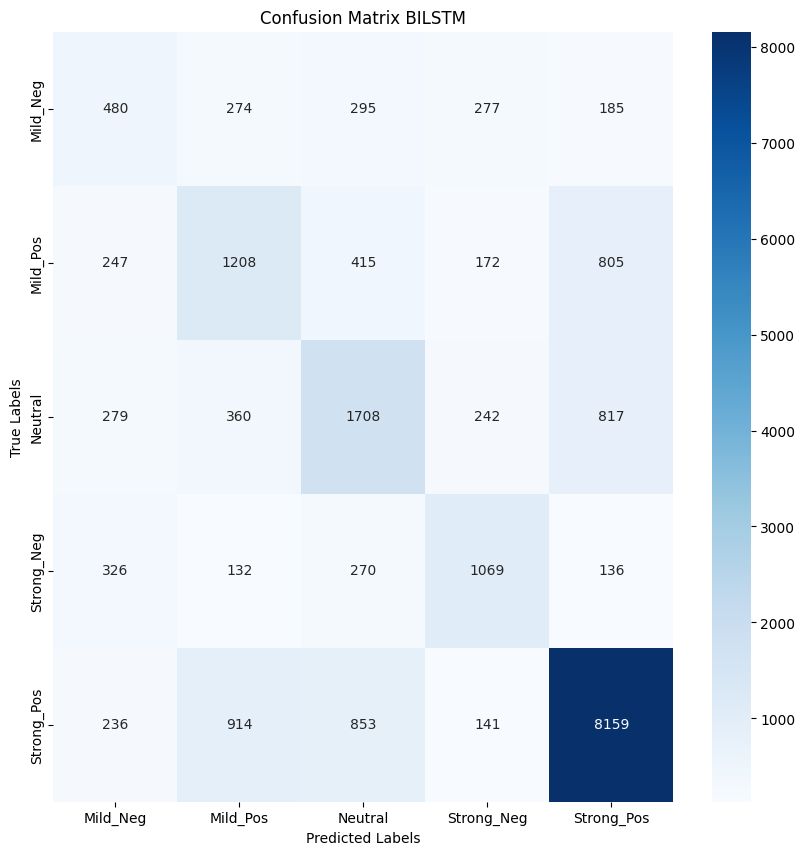

The ROC-AUC Score of our BILSTM model is0.8731809221875


In [ ]:
draw_confusion_matrix(y_preds_class_BILSTM,y_val,'BILSTM')
calc_roc_auc_score(y_preds_BILSTM,y_val,'BILSTM')

## Conclusions
We coould have done ofollowing things to improve the performance of our Transformer model:
* We could have used droput layer in the multiheaded attention layer as we can see that the model is overfitting, this can be one of the reason it is performing worse than the BILSTM model even though BILSTM model is also overfitting.

* We first used less 1000 datapoints, where our model's training accuracy and validation accuracy was saturated, it was around 55% accuracy. When we increased the data to 100k, the accuracy was already at 0.55 at first epoch and ended at 78%.

* Another thing we could have improved was increasing the learning_rate, as we know the default value of the learning_rate is 0.001. Therefore, the training took a long time and the loss was slowly decreasing in each epoch for both training datasets and validation datasets.

* We could have also increased the number of multiheads so that model could have learned more data, we tried to preserve the sequence of the data using positional encoding.

* We could have increased  the number of embedding dimension but because of time and hardware constaint, we couldn't try this.

* We could have used the whole data but we didn't because of time and hardware constraints.

* We can also increase the number of epochs, as we could see the loss was decreasing, but it would have been benificial only if we were using droput layers. As, we saw that model was overfitting.

* Finally, we can see that out BILSTM model is performing better than the transformer, but we think that with the addition of dropoutlayer, increase learning_rate, increasing num_heads and use more data, we could have achieved the best model.